<a href="https://colab.research.google.com/github/JarekMaleszyk/data-science-project-sandbox/blob/main/Seoul_Bike_sharing_demand_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LinearRegression

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

Data from: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [11]:
cols = ["date", "bike_count", "hour", "temperature", "humidity", "wind_speed", "visibility_on_10m", "dew_point_temperature", "solar_radiation", "rainfall_mm", "snowfall_cm", "seasons", "holiday", "functioning_day"]
df = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1', names=cols, skiprows=1)
df.sample(10)

,date,bike_count,hour,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day
5897,03/08/2018,1105,17,35.8,49,3.9,1633,23.4,1.52,0.0,0.0,Summer,No Holiday,Yes
308,13/12/2017,263,20,-7.6,35,0.8,2000,-20.4,0.00,0.0,0.0,Winter,No Holiday,Yes
3732,05/05/2018,1258,12,21.9,35,3.4,1586,5.7,2.74,0.0,0.0,Spring,No Holiday,Yes
450,19/12/2017,384,18,-3.8,42,3.3,2000,-14.8,0.00,0.0,2.0,Winter,No Holiday,Yes
3209,13/04/2018,1662,17,18.1,16,1.4,2000,-8.1,0.45,0.0,0.0,Spring,No Holiday,Yes
4860,21/06/2018,1197,12,26.4,46,1.4,1103,13.8,3.26,0.0,0.0,Summer,No Holiday,Yes
6545,30/08/2018,1473,17,26.8,73,2.6,916,21.5,0.37,0.0,0.0,Summer,No Holiday,Yes
3927,13/05/2018,2329,15,19.7,63,2.5,941,12.4,2.01,0.0,0.0,Spring,No Holiday,Yes
964,10/01/2018,31,4,-6.6,72,2.2,2000,-10.8,0.00,0.0,0.8,Winter,No Holiday,Yes
7252,29/09/2018,301,4,15.4,74,0.9,2000,10.7,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
df.drop(['seasons', 'holiday', 'date'], axis=1, inplace=True)

In [13]:
df.sample(n=10)

,bike_count,hour,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,functioning_day
8511,861,15,11.9,18,3.3,1848,-11.7,1.32,0.0,0.0,Yes
6325,827,13,27.1,66,2.6,1895,20.1,1.54,0.0,0.0,Yes
2875,1268,19,15.2,60,3.2,1081,7.4,0.09,0.0,0.0,Yes
4974,37,6,22.5,83,0.8,537,19.4,0.00,0.4,0.0,Yes
5849,1033,17,39.0,41,2.6,1881,23.3,1.83,0.0,0.0,Yes
8416,1126,16,11.8,66,3.0,687,5.6,0.44,0.0,0.0,Yes
322,189,10,-7.7,43,0.9,1555,-18.1,0.35,0.0,0.0,Yes
8028,907,12,10.0,39,2.0,2000,-3.3,2.20,0.0,0.0,Yes
3564,1278,12,20.5,31,2.5,1485,2.7,3.18,0.0,0.0,Yes
2405,45,5,3.9,85,1.6,264,1.6,0.00,0.0,0.0,Yes


In [14]:
df.temperature[df.temperature >= 0].count()

7327

In [15]:
df.functioning_day = df.functioning_day.map({'Yes': 1, 'No': 0}).astype(int)

In [16]:
df = df[df.hour == 12]
df.drop(columns=['hour'], axis=1, inplace=True)

In [17]:
df

,bike_count,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


In [24]:
for i in range(len(df.columns)):
  print(f"Column [{i}] name: {df.columns[i]}")



Column [0] name: bike_count
Column [1] name: temperature
Column [2] name: humidity
Column [3] name: wind_speed
Column [4] name: visibility_on_10m
Column [5] name: dew_point_temperature
Column [6] name: solar_radiation
Column [7] name: rainfall_mm
Column [8] name: snowfall_cm
Column [9] name: functioning_day


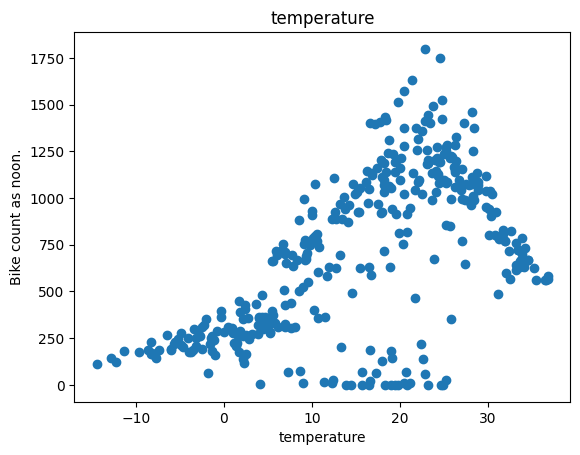

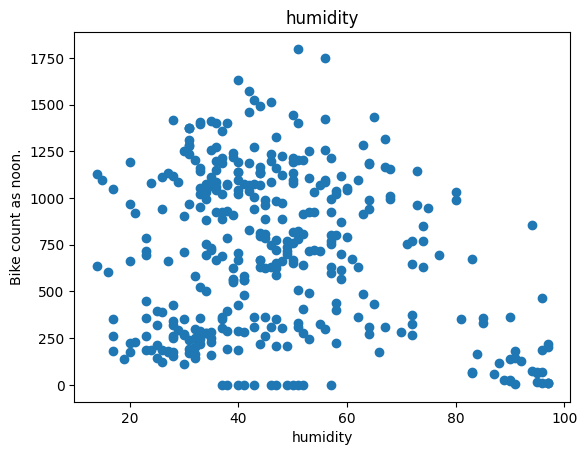

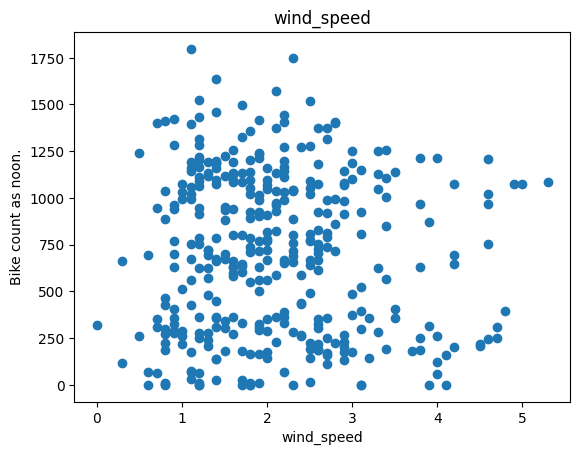

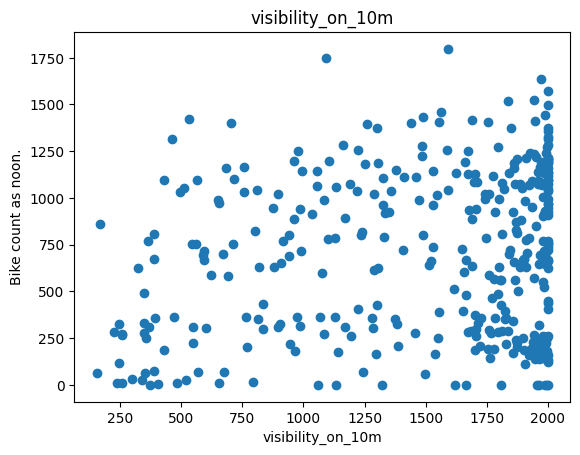

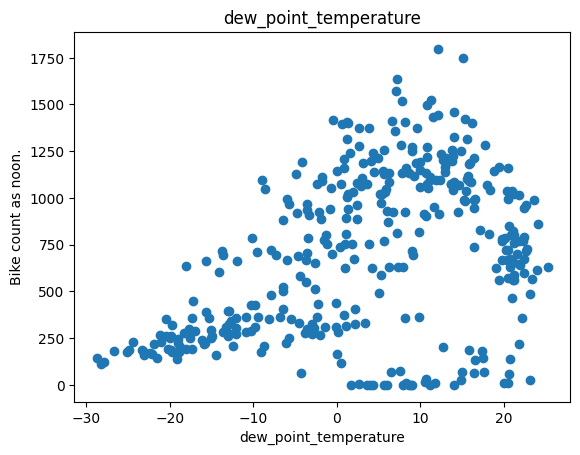

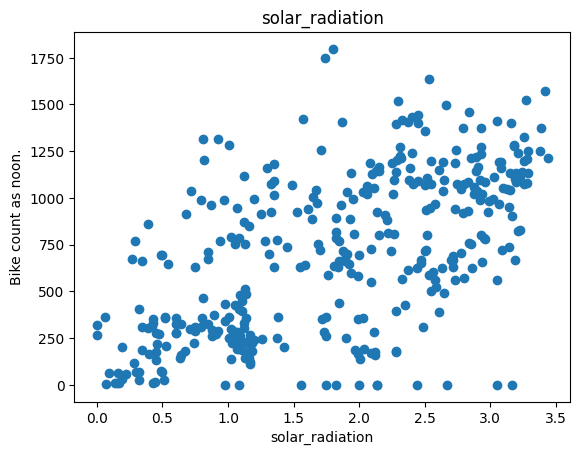

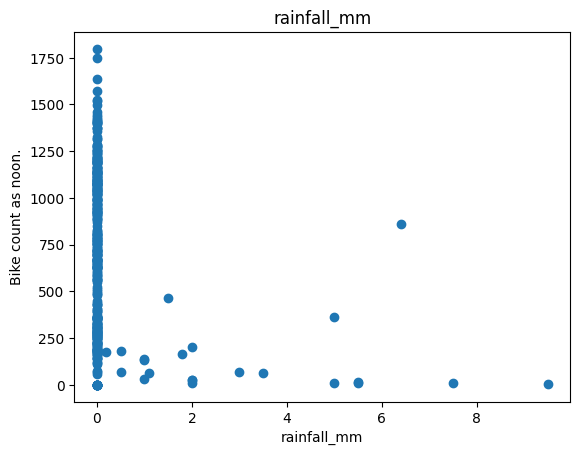

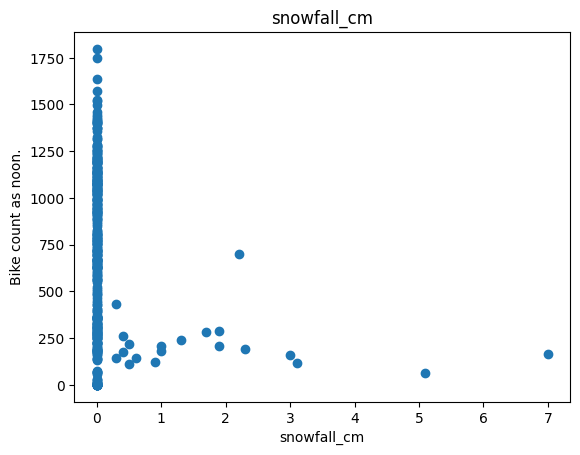

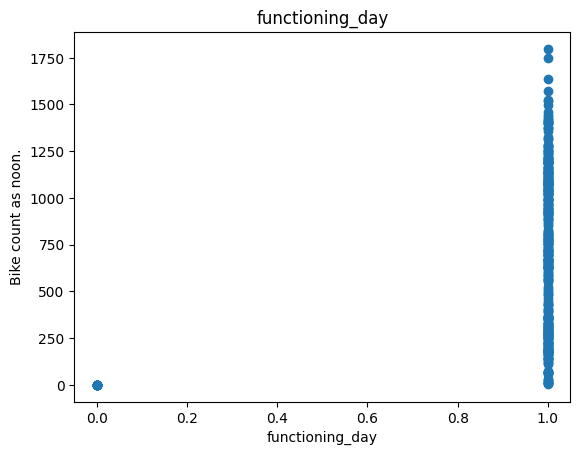

In [29]:
for label in df.columns[1:]:
  plt.scatter(df[label], df.bike_count)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Bike count as noon.')
  # plt.legend()
  plt.show()

In [30]:
df.drop(columns=["wind_speed", "visibility_on_10m", "functioning_day"], axis=1, inplace=True)

In [31]:
df.sample(10)

,bike_count,temperature,humidity,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm
684,363,4.3,62,-2.3,0.52,0.0,0.0
1260,323,3.9,28,-12.9,0.60,0.0,0.0
3660,63,17.3,95,16.4,0.16,3.5,0.0
7596,1402,16.6,36,1.4,2.45,0.0,0.0
4620,1204,23.2,52,12.7,0.82,0.0,0.0
2532,705,9.4,40,-3.5,2.78,0.0,0.0
588,221,-1.6,33,-15.8,1.18,0.0,0.0
1980,351,2.2,17,-20.4,1.99,0.0,0.0
2412,666,9.2,40,-3.7,2.47,0.0,0.0
2892,1072,18.2,38,3.6,2.41,0.0,0.0


In [32]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [37]:
def get_xy(dataframe, y_label, x_label=None):
  dataframe = copy.deepcopy(dataframe)
  if not x_label:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_label) == 1:
      X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_label].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y



In [38]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_label=["temperature"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_label=["temperature"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_label=["temperature"])


In [40]:
temp_regressor = LinearRegression()
temp_regressor.fit(X_train_temp, y_train_temp)

LinearRegression()

In [47]:
print(temp_regressor.coef_)
print(temp_regressor.intercept_)
print(temp_regressor.rank_)
print(temp_regressor.n_features_in_)

[[21.8157834]]
[339.82642021]
1
1


AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

In [43]:
temp_regressor.score(X_train_temp, y_train_temp)

0.3876836125639316

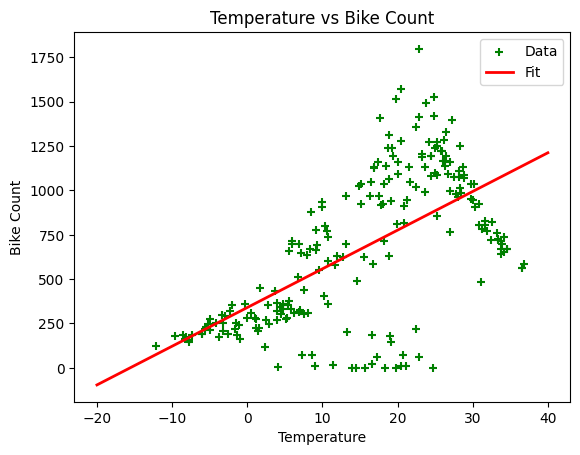

In [52]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_regressor.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()